### Chapter 10 인공 신경망 소개

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

C:\Users\exem\AppData\Local\Temp/ipykernel_12136/78183228.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import os
os.name
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'
import os

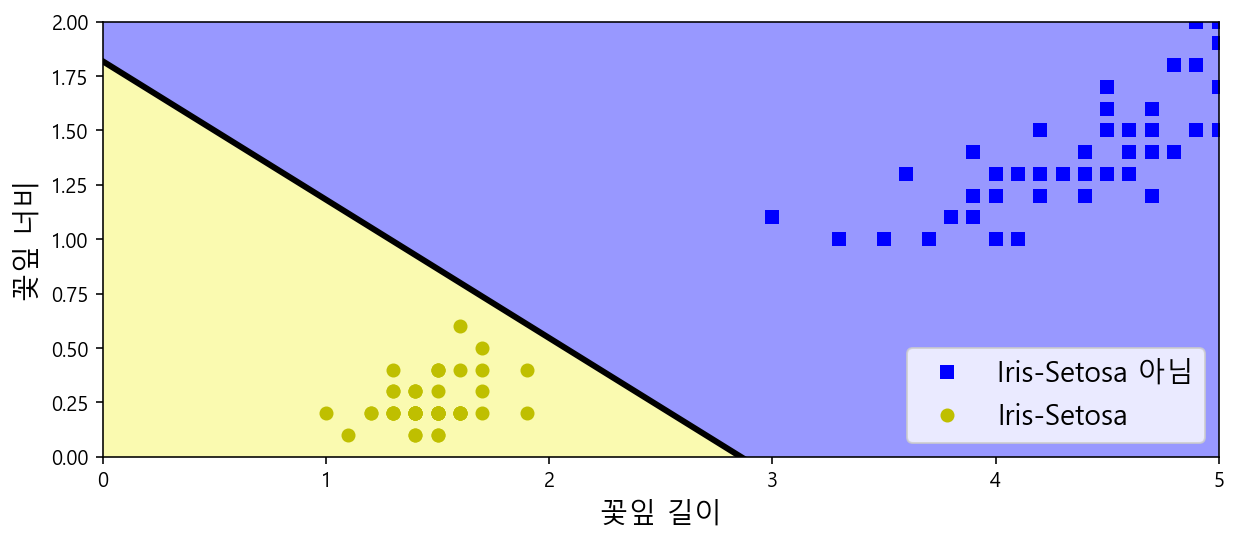

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa 아님")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

#### 활성화 함수

In [8]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

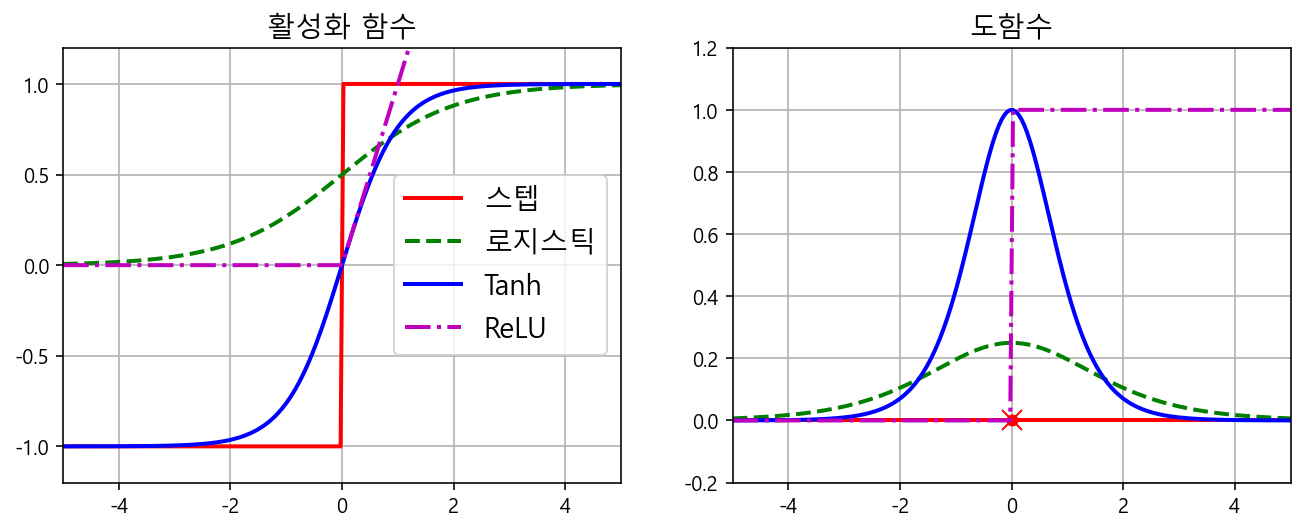

In [9]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="스텝")
plt.plot(z, logit(z), "g--", linewidth=2, label="로지스틱")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("활성화 함수", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("도함수", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

#### 10.2 텐서플로의 고수준 API로 다층 퍼셉트론 훈련하기

In [7]:
import tensorflow as tf

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11501568/11490434 [==============================] - 3s 0us/step


In [11]:
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

AttributeError: module 'tensorflow' has no attribute 'contrib'

In [14]:
 tf.__version__

'2.8.0'

#### 10.2 케라스로 다층 퍼셉트론 구현하기

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
tf.__version__

'2.8.0'

In [17]:
keras.__version__

'2.8.0'

##### 케라스를 사용하여 데이터셋 적재

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [22]:
X_train_full.shape

(60000, 28, 28)

In [23]:
X_train_full.dtype

dtype('uint8')

In [24]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

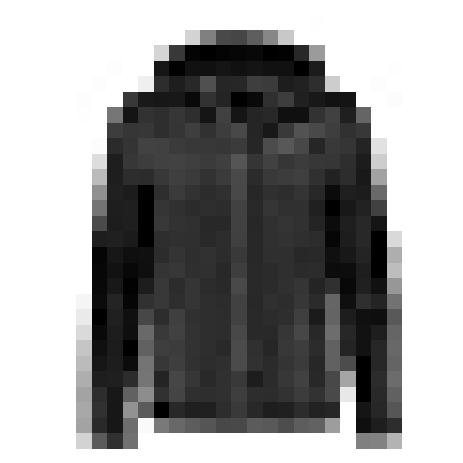

In [25]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [26]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [27]:
class_names[y_train[0]]

'Coat'

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
import pydot

In [42]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [31]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7227 - accuracy: 0.7643 - val_loss: 0.4997 - val_accuracy: 0.8326
Epoch 2/30
1719/1719 [==============================] - 2s 970us/step - loss: 0.4896 - accuracy: 0.8286 - val_loss: 0.4498 - val_accuracy: 0.8452
Epoch 3/30
1719/1719 [==============================] - 2s 952us/step - loss: 0.4437 - accuracy: 0.8443 - val_loss: 0.4173 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4158 - accuracy: 0.8544 - val_loss: 0.4039 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3961 - accuracy: 0.8601 - val_loss: 0.3909 - val_accuracy: 0.8640
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3790 - accuracy: 0.8664 - val_loss: 0.3757 - val_accuracy: 0.8658
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3662 - accuracy: 0.8705 - val_loss: 0.3715 - val_accur

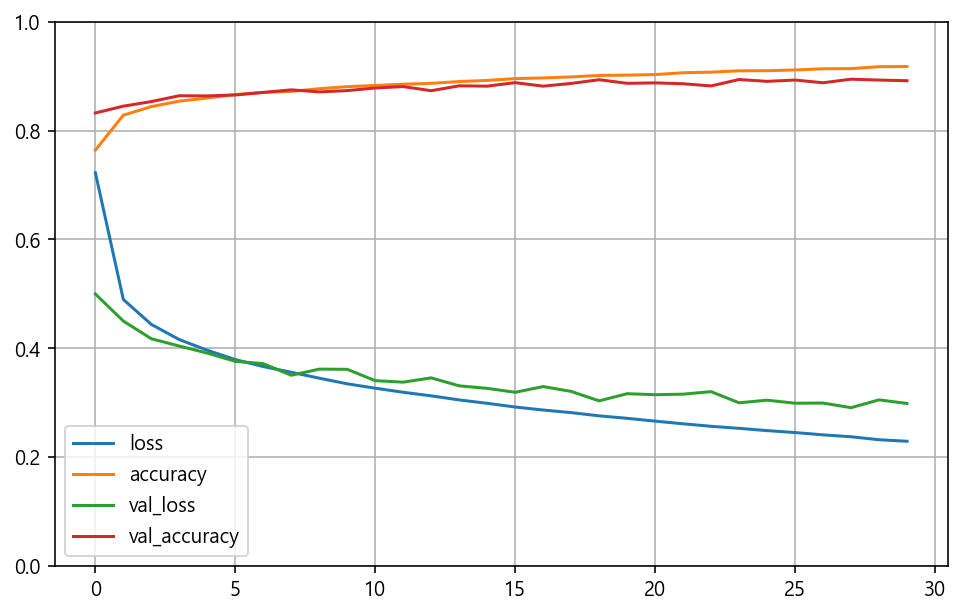

In [36]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [46]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [47]:
np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [48]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

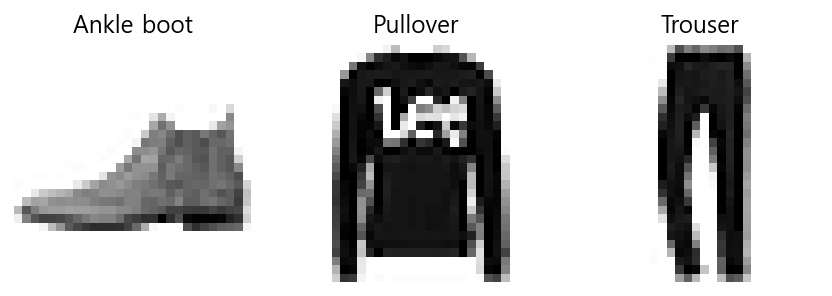

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [54]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
housing = fetch_california_housing()

In [63]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

In [65]:
scaler = StandardScaler()

In [67]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 777us/step - loss: 2.0218 - val_loss: 1.0424
Epoch 2/20
363/363 [==============================] - 0s 589us/step - loss: 0.8409 - val_loss: 0.8186
Epoch 3/20
363/363 [==============================] - 0s 591us/step - loss: 0.7590 - val_loss: 0.7663
Epoch 4/20
363/363 [==============================] - 0s 602us/step - loss: 0.7165 - val_loss: 0.7230
Epoch 5/20
363/363 [==============================] - 0s 586us/step - loss: 0.6792 - val_loss: 0.6851
Epoch 6/20
363/363 [==============================] - 0s 588us/step - loss: 0.6463 - val_loss: 0.6516
Epoch 7/20
363/363 [==============================] - 0s 598us/step - loss: 0.6171 - val_loss: 0.6214
Epoch 8/20
363/363 [==============================] - 0s 588us/step - loss: 0.5910 - val_loss: 0.5953
Epoch 9/20
363/363 [==============================] - 0s 613us/step - loss: 0.5698 - val_loss: 0.5735
Epoch 10/20
363/363 [==============================] - 0s 594us/step - loss: 0.550

#### 함수형 API를 사용해 복잡한 모델 만들기

##### 와이드 & 딥 신경망

In [72]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
### shape과 dtype을 포함하여 모델의 입력을 정의, 한 모델을 여러 개의 입력을 가질 수 있음
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
### 30개의 뉴런과 ReLU 활성화 함수를 가진 Dense 층을 만듦, 입력과 함께 함수 처럼 호출
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
### 두 번째 은닉층을 만들고 함수처럼 호출, 첫 번째 층의 출력을 전달
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
### 하나의 뉴런과 활성화 함수가 없는 출력층을 만들고  Concatenate 층이 만든 결과를 사용해 호출
model = keras.Model(inputs=[input_],outputs=[output])

In [73]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 777us/step - loss: 2.1970 - val_loss: 0.7309
Epoch 2/20
363/363 [==============================] - 0s 661us/step - loss: 0.6918 - val_loss: 0.6399
Epoch 3/20
363/363 [==============================] - 0s 641us/step - loss: 0.6277 - val_loss: 0.5971
Epoch 4/20
363/363 [==============================] - 0s 645us/step - loss: 0.5882 - val_loss: 0.5648
Epoch 5/20
363/363 [==============================] - 0s 603us/step - loss: 0.5605 - val_loss: 0.5389
Epoch 6/20
363/363 [==============================] - 0s 679us/step - loss: 0.5397 - val_loss: 0.5194
Epoch 7/20
363/363 [==============================] - 0s 644us/step - loss: 0.5199 - val_loss: 0.5011
Epoch 8/20
363/363 [==============================] - 0s 633us/step - loss: 0.5053 - val_loss: 0.4871
Epoch 9/20
363/363 [==============================] - 0s 665us/step - loss: 0.4915 - val_loss: 0.4747
Epoch 10/20
363/363 [==============================] - 0s 642us/step - loss: 0.480

In [74]:
y_pred

array([[2.0995116],
       [1.7619865],
       [1.7374291]], dtype=float32)

In [75]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [76]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 811us/step - loss: 2.1868 - val_loss: 1.1246
Epoch 2/20
363/363 [==============================] - 0s 643us/step - loss: 0.9246 - val_loss: 0.8249
Epoch 3/20
363/363 [==============================] - 0s 643us/step - loss: 0.7780 - val_loss: 0.7414
Epoch 4/20
363/363 [==============================] - 0s 690us/step - loss: 0.7192 - val_loss: 0.6927
Epoch 5/20
363/363 [==============================] - 0s 670us/step - loss: 0.6808 - val_loss: 0.6583
Epoch 6/20
363/363 [==============================] - 0s 684us/step - loss: 0.6510 - val_loss: 0.6299
Epoch 7/20
363/363 [==============================] - 0s 686us/step - loss: 0.6259 - val_loss: 0.6065
Epoch 8/20
363/363 [==============================] - 0s 773us/step - loss: 0.6041 - val_loss: 0.5847
Epoch 9/20
363/363 [==============================] - 0s 731us/step - loss: 0.5850 - val_loss: 0.5657
Epoch 10/20
363/363 [==============================] - 0s 804us/step - loss: 0.568

##### 다중 작업 분류

In [77]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [78]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [79]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.8049 - main_output_loss: 2.4839 - aux_output_loss: 5.6937 - val_loss: 1.4773 - val_main_output_loss: 1.1432 - val_aux_output_loss: 4.4847
Epoch 2/20
363/363 [==============================] - 0s 785us/step - loss: 1.2045 - main_output_loss: 0.9361 - aux_output_loss: 3.6194 - val_loss: 1.0273 - val_main_output_loss: 0.8217 - val_aux_output_loss: 2.8775
Epoch 3/20
363/363 [==============================] - 0s 793us/step - loss: 0.9105 - main_output_loss: 0.7430 - aux_output_loss: 2.4179 - val_loss: 0.8437 - val_main_output_loss: 0.7062 - val_aux_output_loss: 2.0808
Epoch 4/20
363/363 [==============================] - 0s 800us/step - loss: 0.7809 - main_output_loss: 0.6649 - aux_output_loss: 1.8254 - val_loss: 0.7504 - val_main_output_loss: 0.6461 - val_aux_output_loss: 1.6890
Epoch 5/20
363/363 [==============================] - 0s 786us/step - loss: 0.7126 - main_output_loss: 0.6209 - aux_output_loss: 1.5377 - 

In [80]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 552us/step - loss: 0.4985 - main_output_loss: 0.4461 - aux_output_loss: 0.9709


#### 모델 저장과 복원

In [87]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [88]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 948us/step - loss: 1.6601 - val_loss: 0.8904
Epoch 2/10
363/363 [==============================] - 0s 813us/step - loss: 0.7609 - val_loss: 0.7179
Epoch 3/10
363/363 [==============================] - 0s 692us/step - loss: 0.6790 - val_loss: 0.6490
Epoch 4/10
363/363 [==============================] - 0s 703us/step - loss: 0.6320 - val_loss: 0.6060
Epoch 5/10
363/363 [==============================] - 0s 790us/step - loss: 0.5967 - val_loss: 0.5744
Epoch 6/10
363/363 [==============================] - 0s 683us/step - loss: 0.5691 - val_loss: 0.5507
Epoch 7/10
363/363 [==============================] - 0s 751us/step - loss: 0.5463 - val_loss: 0.5310
Epoch 8/10
363/363 [==============================] - 0s 794us/step - loss: 0.5297 - val_loss: 0.5145
Epoch 9/10
363/363 [==============================] - 0s 858us/step - loss: 0.5140 - val_loss: 0.5015
Epoch 10/10
162/162 [==============================] - 0s 501us/step - loss: 0.484

In [89]:
model.save("my_keras_model.h5")

In [90]:
model = keras.models.load_model("my_keras_model.h5")

In [91]:
X_new = X_test[:3]

In [92]:
model.predict(X_new)

array([[2.0398312],
       [1.8005103],
       [1.835253 ]], dtype=float32)